In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
import torch
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

*The Given Dataset is:*

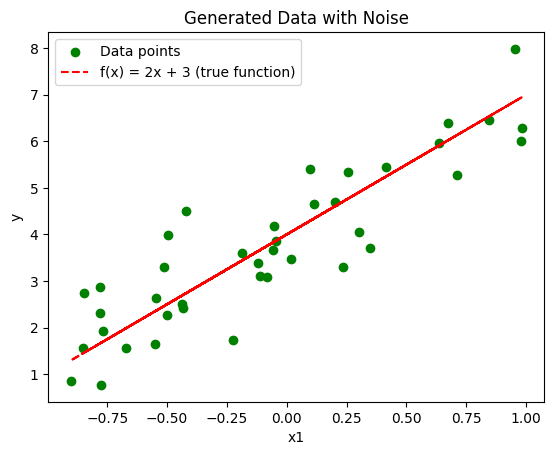

In [ ]:
np.random.seed(45)
num_samples = 40

x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

plt.scatter(x1, y, color='green', label='Data points')
plt.plot(x1, f_x, color='red', label='f(x) = 2x + 3 (true function)', linestyle='--')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Generated Data with Noise')
plt.legend()
plt.show()


### <i> **Question 1:**
*Use torch.autograd to find the true gradient on the above dataset using linear regression (in the form $\theta_1 x + \theta_0$) for any given values of $(\theta_0, \theta_1)$.*


Linear Model used is :
$$
y_{\text{pred}} = \theta_0 + \theta_1 x
$$


In [10]:
np.random.seed(45)
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Convert to torch tensors
x_tensor = torch.tensor(x1, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)


theta0 = torch.tensor(4.0, requires_grad=True)
theta1 = torch.tensor(0.0, requires_grad=True)


def linear_model(x, theta0, theta1):
    return theta1 * x + theta0


y_pred = linear_model(x_tensor, theta0, theta1)


loss = torch.mean((y_pred - y_tensor) ** 2)

# Compute gradients using torch.autograd.grad
grads = torch.autograd.grad(loss, [theta0, theta1],retain_graph=True)


print(f"True Gradient of theta0: {grads[0].item()}")
print(f"True gradient of  theta1: {grads[1].item()}")

True Gradient of theta0: 0.5529460310935974
True gradient of  theta1: -1.7028251886367798


### <i>**Question 2:**
*Using the same $(\theta_0, \theta_1)$ as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient.*

True Gradient w.r.t theta0: 0.5529460310935974
True Gradient w.r.t theta1: -1.7028251886367798
Averaged Stochastic Gradient w.r.t theta0: 0.5529460430145263
Averaged Stochastic Gradient w.r.t theta1: -1.7028252231830265


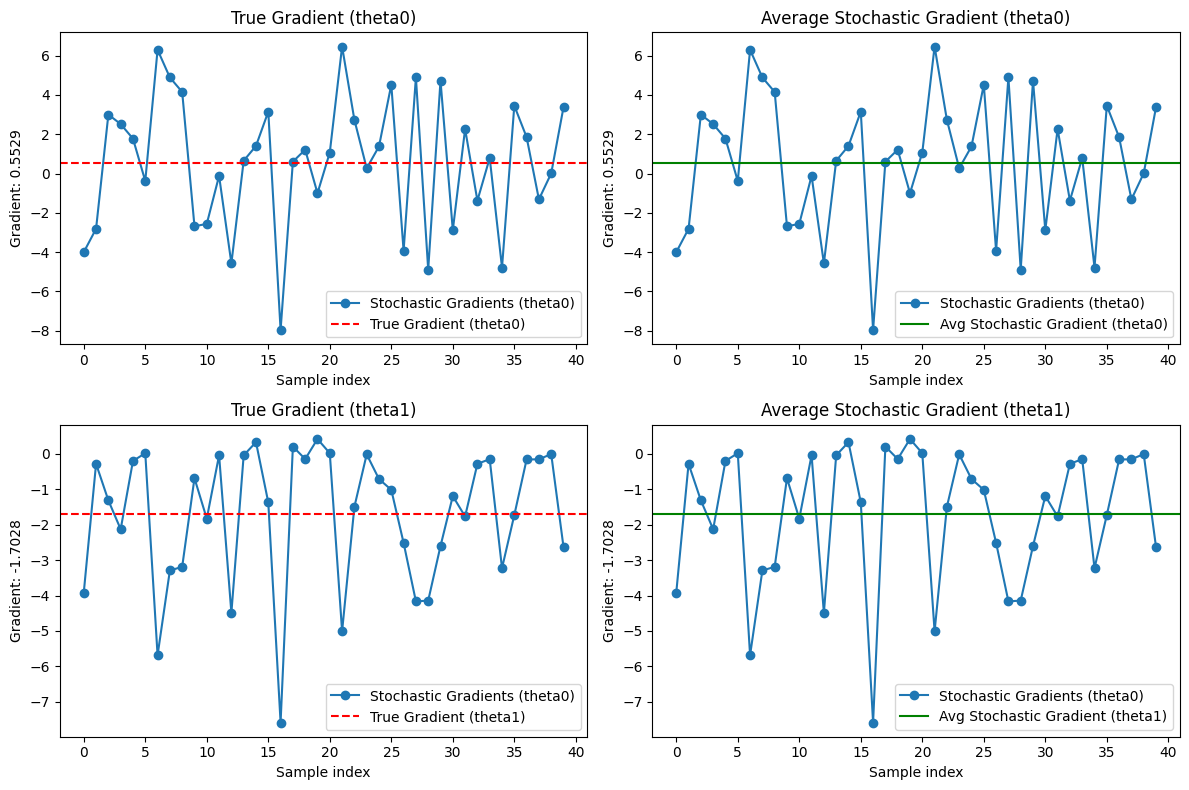

In [11]:
stochastic_grads_theta0 = []
stochastic_grads_theta1 = []

for i in range(num_samples):
    y_pred_i = linear_model(x_tensor[i], theta0, theta1)
    loss_i = (y_pred_i - y_tensor[i]) ** 2  # Loss for a single data point

    # Compute gradients for the i-th data point
    grads_i = torch.autograd.grad(loss_i, [theta0, theta1], retain_graph=True)
    stochastic_grads_theta0.append(grads_i[0].item())
    stochastic_grads_theta1.append(grads_i[1].item())


avg_grad_theta0 = np.mean(stochastic_grads_theta0)
avg_grad_theta1 = np.mean(stochastic_grads_theta1)


print(f"True Gradient w.r.t theta0: {grads[0].item()}")
print(f"True Gradient w.r.t theta1: {grads[1].item()}")
print(f"Averaged Stochastic Gradient w.r.t theta0: {avg_grad_theta0}")
print(f"Averaged Stochastic Gradient w.r.t theta1: {avg_grad_theta1}")


grad_indices = np.arange(num_samples)

plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
plt.plot(grad_indices, stochastic_grads_theta0, label="Stochastic Gradients (theta0)", marker='o')
plt.axhline(y=grads[0].item(), color='r', linestyle='--', label="True Gradient (theta0)")
plt.title('True Gradient (theta0)')
plt.xlabel('Sample index')
plt.ylabel(f"Gradient: {grads[0].item():.4f}")
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(grad_indices, stochastic_grads_theta0, label="Stochastic Gradients (theta0)", marker='o')
plt.axhline(y=avg_grad_theta0, color='g', linestyle='-', label="Avg Stochastic Gradient (theta0)")
plt.title('Average Stochastic Gradient (theta0)')
plt.xlabel('Sample index')
plt.ylabel(f"Gradient: {avg_grad_theta0:.4f}")
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(grad_indices, stochastic_grads_theta1, label="Stochastic Gradients (theta0)", marker='o')
plt.axhline(y=grads[1].item(), color='r', linestyle='--', label="True Gradient (theta1)")
plt.title('True Gradient (theta1)')
plt.xlabel('Sample index')
plt.ylabel(f"Gradient: {grads[1].item():.4f}")
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(grad_indices, stochastic_grads_theta1, label="Stochastic Gradients (theta0)", marker='o')
plt.axhline(y=avg_grad_theta1, color='g', linestyle='-', label="Avg Stochastic Gradient (theta1)")
plt.title('Average Stochastic Gradient (theta1)')
plt.xlabel('Sample index')
plt.ylabel(f"Gradient: {avg_grad_theta1:.4f}")
plt.legend()

plt.tight_layout()
plt.show()

### <i> **Question 3:**
*Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of ϵ or (ϵ-neighborhood) from the minimum value of the loss function. Visualize the convergence process for 15 epochs. Choose ϵ=0.001 for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods.*

<i>*Defining Datase,linear model,initila values of $(\theta_0, \theta_1)$.*

In [12]:

np.random.seed(45)
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

x_tensor = torch.tensor(x1, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Initialize theta0 and theta1 with some values, requires gradient
theta0 = torch.tensor(4.0, requires_grad=True)
theta1 = torch.tensor(0.0, requires_grad=True)

# Define the linear model
def linear_model(x, theta0, theta1):
    return theta1 * x + theta0


<i>*Number of iterations,epochs and loss for Full batch ,Mini Batch and Stochastic gradient descent used to reach convergence criteria of ϵ=0.001*

<i>Some calculations used are as follows:
1. Mean Squared Error:
$$
\text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{pred},i} - y_{\text{true},i})^2
$$
2.Gradient Descent updates:
$$
\theta_0 \leftarrow \theta_0 - \alpha \frac{\partial \text{Loss}}{\partial \theta_0}
$$
$$
\theta_1 \leftarrow \theta_1 - \alpha \frac{\partial \text{Loss}}{\partial \theta_1}
$$
3. Converging Criterion is:
$$
\text{Stop if} \ | \text{Loss}_{t} - \text{Loss}_{t-1} | < \epsilon
$$



In [14]:
def loss_fn(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

# Full-batch Gradient Descent
def full_batch_gradient_descent(x_tensor, y_tensor, theta0, theta1, learning_rate, epsilon,max_epoch):
    losses = []
    theta0_vals = [theta0.item()]
    theta1_vals = [theta1.item()]
    iteration = 0
    # while True:
    for j in range(max_epoch):
        iteration += 1
        y_pred = linear_model(x_tensor, theta0, theta1)
        loss = loss_fn(y_pred, y_tensor)
       # print(loss)
        losses.append(loss.item())

        loss.backward()
        with torch.no_grad():
            theta0 -= learning_rate * theta0.grad
            theta1 -= learning_rate * theta1.grad

        theta0_vals.append(theta0.item())
        theta1_vals.append(theta1.item())

        theta0.grad.zero_()
        theta1.grad.zero_()

        
        if len(losses) > 1 and abs(losses[-1] - losses[-2]) < epsilon:
            break
    print("No. of iterations for full batch:",len(losses))
    # print(theta0_vals)
    return losses, iteration, theta0_vals, theta1_vals

# Mini-batch Gradient Descent
def mini_batch_gradient_descent(x_tensor, y_tensor, theta0, theta1, learning_rate, epsilon, batch_size,max_epoch):
    losses = []
    theta0_vals = [theta0.item()]
    theta1_vals = [theta1.item()]
    num_samples = x_tensor.size(0)
    iteration = 0
    for j in range(max_epoch):
        iteration += 1
        indices = torch.randperm(num_samples)
        x_tensor_shuffled = x_tensor[indices]
        y_tensor_shuffled = y_tensor[indices]

        for i in range(0, num_samples, batch_size):
            x_batch = x_tensor_shuffled[i:i + batch_size]
            y_batch = y_tensor_shuffled[i:i + batch_size]

            y_pred = linear_model(x_batch, theta0, theta1)
            loss = loss_fn(y_pred, y_batch)
            #print(loss)
            losses.append(loss.item())

            loss.backward()
            with torch.no_grad():
                theta0 -= learning_rate * theta0.grad
                theta1 -= learning_rate * theta1.grad

            theta0_vals.append(theta0.item())
            theta1_vals.append(theta1.item())

            theta0.grad.zero_()
            theta1.grad.zero_()

    
        loss_epoch_mini.append(loss.item())
        if len(losses) > 1 and abs(losses[-1] - losses[-2]) < epsilon:
            break
    print("No. of iterations for mini batch:",len(losses))

    return losses, iteration, theta0_vals, theta1_vals

# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(x_tensor, y_tensor, theta0, theta1, learning_rate, epsilon,max_epoch):
    losses = []
    theta0_vals = [theta0.item()]
    theta1_vals = [theta1.item()]
    num_samples = x_tensor.size(0)
    iteration = 0
    # while True:
    for j in range(max_epoch):

        iteration += 1
        indices = torch.randperm(num_samples)
        x_tensor_shuffled = x_tensor[indices]
        y_tensor_shuffled = y_tensor[indices]

        for i in range(num_samples):
            x_single = x_tensor_shuffled[i:i + 1]
            y_single = y_tensor_shuffled[i:i + 1]

            y_pred = linear_model(x_single, theta0, theta1)
            loss = loss_fn(y_pred, y_single)
            # print(loss)
            losses.append(loss.item())

            loss.backward()
            with torch.no_grad():
                theta0 -= learning_rate * theta0.grad
                theta1 -= learning_rate * theta1.grad

            theta0_vals.append(theta0.item())
            theta1_vals.append(theta1.item())

            theta0.grad.zero_()
            theta1.grad.zero_()
        loss_epoch_sgd.append(loss.item())
      
        if len(losses) > 1 and abs(losses[-1] - losses[-2]) < epsilon:
            break
    print("No. of iterations for sgd:",len(losses))
    # print(theta0_vals)
    return losses, iteration, theta0_vals, theta1_vals


theta0_full = torch.tensor(4.0, requires_grad=True)
theta1_full = torch.tensor(0.0, requires_grad=True)

theta0_mini = torch.tensor(4.0, requires_grad=True)
theta1_mini = torch.tensor(0.0, requires_grad=True)

theta0_sgd = torch.tensor(4.0, requires_grad=True)
theta1_sgd = torch.tensor(0.0, requires_grad=True)


learning_rate = 0.01
epsilon_full = 0.001
epsilon_mini = 0.001
epsilon_sgd = 0.001
batch_size = 10
max_epoch=1000
loss_epoch_sgd=[]
loss_epoch_mini= []


full_batch_losses, full_batch_iters, theta0_vals_full, theta1_vals_full = full_batch_gradient_descent(
    x_tensor, y_tensor, theta0_full, theta1_full, learning_rate, epsilon_full,max_epoch)

mini_batch_losses, mini_batch_iters, theta0_vals_mini, theta1_vals_mini = mini_batch_gradient_descent(
    x_tensor, y_tensor, theta0_mini, theta1_mini, learning_rate, epsilon_mini, batch_size,max_epoch)

sgd_losses, sgd_iters, theta0_vals_sgd, theta1_vals_sgd = stochastic_gradient_descent(
    x_tensor, y_tensor, theta0_sgd, theta1_sgd, learning_rate, epsilon_sgd,max_epoch)

print(f"for full batch: epochs={full_batch_iters} , loss={full_batch_losses[-1]}")
print(f"for mini batch: epochs={mini_batch_iters} , loss={mini_batch_losses[-1]}")
print(f"for sgd batch: epochs={sgd_iters} , loss={sgd_losses[-1]}")
print(f"loss epoch for full batch: {len(full_batch_losses)}")
print(f"loss epoch for mini batch: {len(loss_epoch_mini)}")
print(f"loss epoch for sgd batch: {len(loss_epoch_sgd)}")

theta0_range = np.linspace(-1, 5, 100)
theta1_range = np.linspace(-1, 5, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_range, theta1_range)

loss_grid = np.zeros_like(theta0_grid)
for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        theta0_val = theta0_grid[i, j]
        theta1_val = theta1_grid[i, j]
        y_pred_grid = theta0_val + theta1_val * x1
        loss_grid[i, j] = np.mean((y - y_pred_grid) ** 2)



No. of iterations for full batch: 269
No. of iterations for mini batch: 4000
No. of iterations for sgd: 9040
for full batch: epochs=269 , loss=0.6764823198318481
for mini batch: epochs=1000 , loss=0.7196713089942932
for sgd batch: epochs=226 , loss=0.10588647425174713
loss epoch for full batch: 269
loss epoch for mini batch: 1000
loss epoch for sgd batch: 226


<i>*average number of iterations taken for each method to get sufficiently close to the optimal solution*

In [15]:
theta0f=theta0_vals_full[:15]
lf=full_batch_losses[:15]
lm=loss_epoch_mini[:15]
ls=loss_epoch_sgd[:15]
theta1f=theta1_vals_full[:15]
theta0m=theta0_vals_mini[:15]
theta1m=theta1_vals_mini[:15]
theta0s=theta0_vals_sgd[:15]
theta1s=theta1_vals_sgd[:15]



<i>Plotting loss vs epochs for convergence

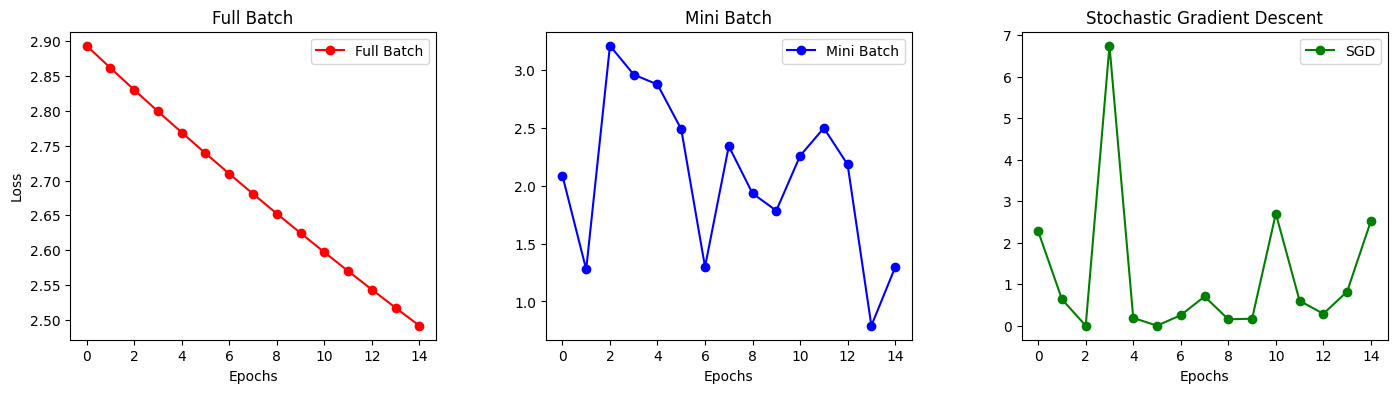

In [39]:
plt.figure(figsize=(17, 4))  
plt.subplot(1, 3, 1)
plt.plot(range(0, 15), full_batch_losses[:15], marker="o", color='red', label='Full Batch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Full Batch')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(0, 15), loss_epoch_mini[:15], marker="o", color='blue', label='Mini Batch')
plt.xlabel('Epochs')
plt.title('Mini Batch')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(0, 15), loss_epoch_sgd[:15], marker="o", color='green', label='SGD')
plt.xlabel('Epochs')

plt.title('Stochastic Gradient Descent')
plt.legend()

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


<i>Average number of iterations for vanila gradient descent

In [ ]:
def calculate_average_loss(method, x_tensor, y_tensor, learning_rate, epsilon, batch_size=None):
    losses = []
    iteration=[]

    for _ in range(20):
        theta0 = torch.tensor(np.random.uniform(-10, 10), requires_grad=True)
        theta1 = torch.tensor(np.random.uniform(-10, 10), requires_grad=True)
        if method == "full_batch":
            method_losses, method_itter, _, _ = full_batch_gradient_descent(x_tensor, y_tensor, theta0, theta1, learning_rate, epsilon,max_epoch)
        elif method == "mini_batch":
            method_losses, method_itter, _, _ = mini_batch_gradient_descent(x_tensor, y_tensor, theta0, theta1, learning_rate, epsilon, batch_size,max_epoch)
        elif method == "sgd":
            method_losses, method_itter, _, _ = stochastic_gradient_descent(x_tensor, y_tensor, theta0, theta1, learning_rate, epsilon,max_epoch)

        losses.append(method_losses[-1])
        iteration.append(method_itter)

    return np.mean(losses), np.mean(iteration)



learning_rate = 0.01
epsilon_full = 0.001
epsilon_mini = 0.001
epsilon_sgd = 0.001
batch_size = 10
max_epoch=1000


avg_full_batch_loss,avg_full_itter = calculate_average_loss("full_batch", x_tensor, y_tensor, learning_rate, epsilon_full)
avg_mini_batch_loss,avg_mini_itter = calculate_average_loss("mini_batch", x_tensor, y_tensor, learning_rate, epsilon_mini, batch_size)
avg_sgd_loss,avg_sgd_itter= calculate_average_loss("sgd", x_tensor, y_tensor, learning_rate, epsilon_sgd)

print(f"Average full batch loss over 20 random initializations: {avg_full_batch_loss}, Average number of iteration: {avg_full_itter}")
print(f"Average mini batch loss over 20 random initializations: {avg_mini_batch_loss}, Average number of iteration: {avg_mini_itter}")
print(f"Average SGD batch loss over 20 random initializations: {avg_sgd_loss}, Average number of iteration: {avg_sgd_itter}")


Average full batch loss over 20 random initializations: 0.6636976152658463, Average number of iteration: 311.45
Average mini batch loss over 20 random initializations: 0.6030830517411232, Average number of iteration: 450.35
Average SGD batch loss over 20 random initializations: 0.05752422309342364, Average number of iteration: 335.85


<i>plotting contour plots for vanila gradient descent

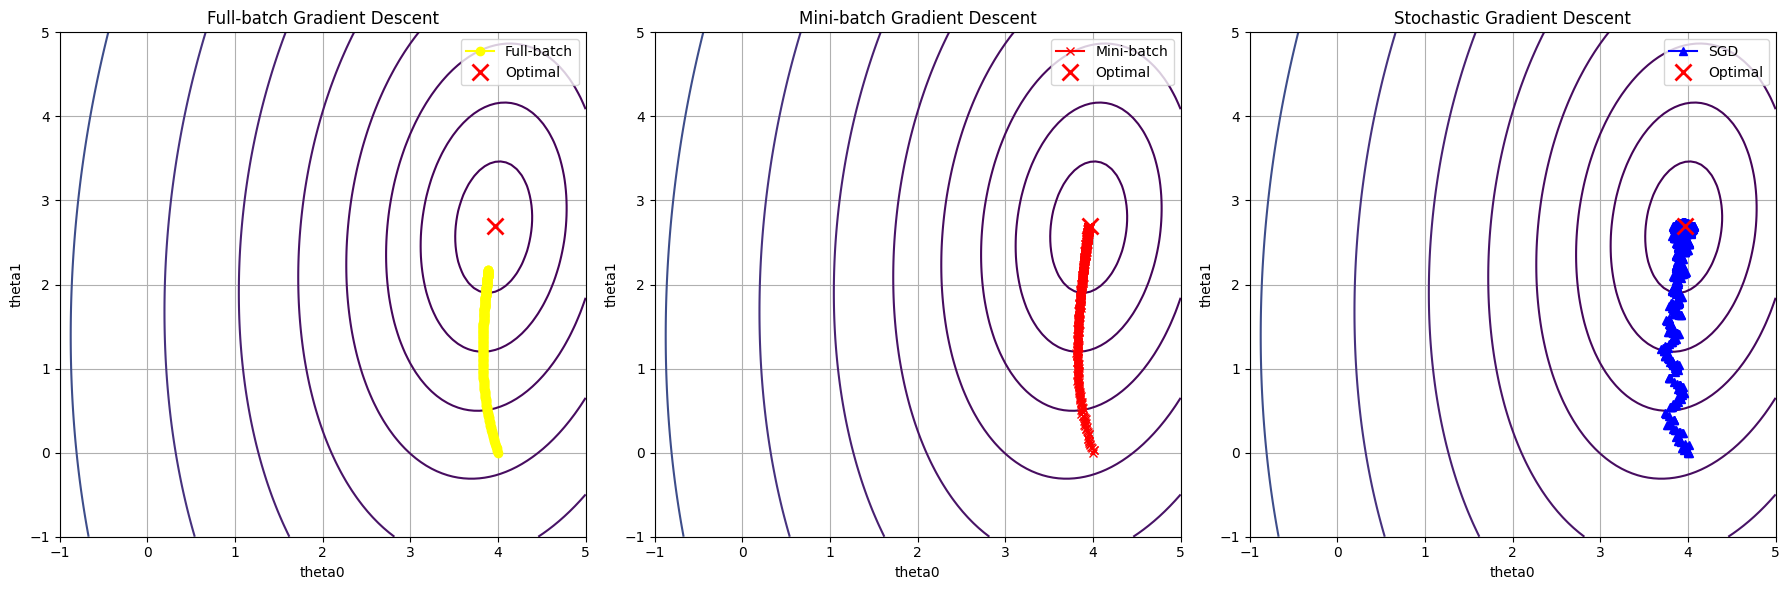

In [ ]:
min_loss_idx = np.unravel_index(np.argmin(loss_grid), loss_grid.shape)
optimal_theta0 = theta0_grid[min_loss_idx]
optimal_theta1 = theta1_grid[min_loss_idx]


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Full-batch Gradient Descent
axes[0].contour(theta0_grid, theta1_grid, loss_grid, levels=np.logspace(-2, 2, 20), cmap='viridis')
axes[0].plot(theta0_vals_full, theta1_vals_full, 'o-', color='yellow', label='Full-batch')
axes[0].plot(optimal_theta0, optimal_theta1, 'rx', markersize=12, label='Optimal', markeredgewidth=2)  # Cross at the center
axes[0].set_title('Full-batch Gradient Descent')
axes[0].set_xlabel('theta0')
axes[0].set_ylabel('theta1')
axes[0].grid(True)
axes[0].legend()

# Plot for Mini-batch Gradient Descent
axes[1].contour(theta0_grid, theta1_grid, loss_grid, levels=np.logspace(-2, 2, 20), cmap='viridis')
axes[1].plot(theta0_vals_mini, theta1_vals_mini, 'x-', color='red', label='Mini-batch')
axes[1].plot(optimal_theta0, optimal_theta1, 'rx', markersize=12, label='Optimal', markeredgewidth=2)  # Cross at the center
axes[1].set_title('Mini-batch Gradient Descent')
axes[1].set_xlabel('theta0')
axes[1].set_ylabel('theta1')
axes[1].grid(True)
axes[1].legend()

# Plot for Stochastic Gradient Descent
axes[2].contour(theta0_grid, theta1_grid, loss_grid, levels=np.logspace(-2, 2, 20), cmap='viridis')
axes[2].plot(theta0_vals_sgd, theta1_vals_sgd, '^-', color='blue', label='SGD')
axes[2].plot(optimal_theta0, optimal_theta1, 'rx', markersize=12, label='Optimal', markeredgewidth=2)  # Cross at the center
axes[2].set_title('Stochastic Gradient Descent')
axes[2].set_xlabel('theta0')
axes[2].set_ylabel('theta1')
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
plt.show()

<i> Animation of convergence for 15 epochs for vanila gradient descent

<ipython-input-23-1a2f82ae29df>:26: UserWarning: The following kwargs were not used by contour: 'color'
  contour = ax.contour(theta_0_vals, theta_1_vals, loss_vals, levels=50,color='black')
<ipython-input-23-1a2f82ae29df>:32: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(theta_0_vals, theta_1_vals, loss_vals, levels=50,color='black')
<ipython-input-23-1a2f82ae29df>:26: UserWarning: The following kwargs were not used by contour: 'color'
  contour = ax.contour(theta_0_vals, theta_1_vals, loss_vals, levels=50,color='black')
<ipython-input-23-1a2f82ae29df>:32: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(theta_0_vals, theta_1_vals, loss_vals, levels=50,color='black')
<ipython-input-23-1a2f82ae29df>:26: UserWarning: The following kwargs were not used by contour: 'color'
  contour = ax.contour(theta_0_vals, theta_1_vals, loss_vals, levels=50,color='black')
<ipython-input-23-1a2f82ae29df>:32: UserWarning: The following kw

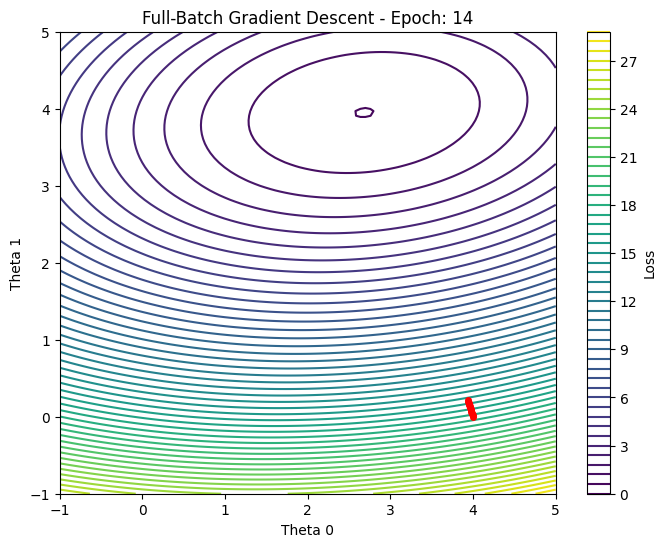

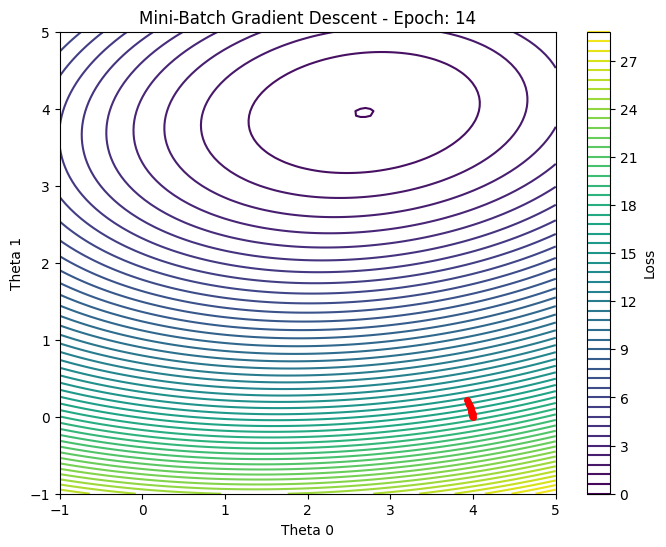

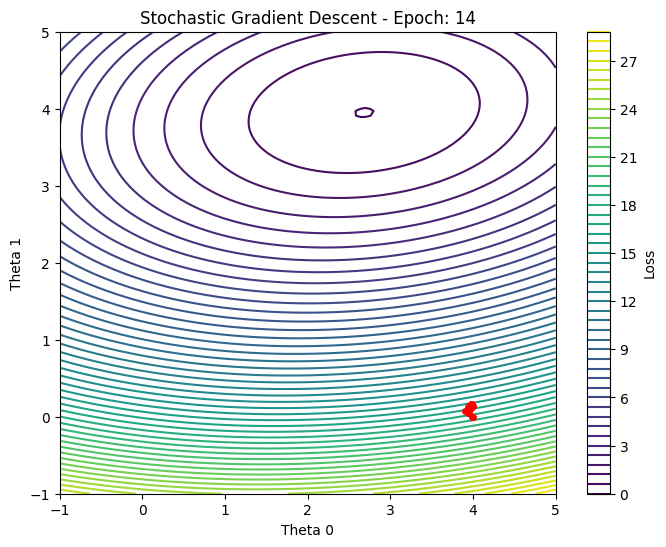

In [23]:
def compute_loss(theta_0, theta_1, x, y):
    y_pred = theta_0 + theta_1 * x
    loss = ((y_pred - y) ** 2).mean()
    return loss


def create_animation(x, y, trajectories, titles, filename):
    fig, ax = plt.subplots(figsize=(8, 6))
    theta_0_vals = np.linspace(-1, 5, 100)
    theta_1_vals = np.linspace(-1, 5, 100)
    loss_vals = np.zeros((len(theta_0_vals), len(theta_1_vals)))

    for i in range(len(theta_0_vals)):
        for j in range(len(theta_1_vals)):
            theta_0 = torch.tensor(theta_0_vals[i], requires_grad=False)
            theta_1 = torch.tensor(theta_1_vals[j], requires_grad=False)
            loss_vals[i, j] = compute_loss(theta_0, theta_1, x, y).item()

    contour = ax.contour(theta_0_vals, theta_1_vals, loss_vals, levels=50,color='black')
    cbar = fig.colorbar(contour)
    cbar.ax.set_ylabel('Loss')

    def update(frame):
        ax.clear()
        ax.contour(theta_0_vals, theta_1_vals, loss_vals, levels=50,color='black')
        ax.set_title(f'{titles[0]} - Epoch: {frame}')
        ax.set_xlabel('Theta 0')
        ax.set_ylabel('Theta 1')

        trajectory = np.array(trajectories[0])
        ax.plot(trajectory[:frame, 0], trajectory[:frame, 1], marker='o', color='red', linestyle='-', linewidth=2, markersize=4)
        ax.scatter(trajectory[min(frame, len(trajectory)-1), 0], trajectory[min(frame, len(trajectory)-1), 1], marker='x', color='white', s=100)
        return ax

    ani = FuncAnimation(fig, update, frames=range(0, max(len(lf), len(lm), len(ls)), 1), repeat=False)
    ani.save(filename, writer='pillow')


trajectory_full = list(zip(theta0f, theta1f))
trajectory_mini = list(zip(theta0m, theta1m))
trajectory_stochastic = list(zip(theta0s, theta1s))
# Create animations for each method
create_animation(x_tensor, y_tensor, [trajectory_full], ["Full-Batch Gradient Descent"], filename='Vanilla_full_batch_optimization.gif')
create_animation(x_tensor, y_tensor, [trajectory_mini], ["Mini-Batch Gradient Descent"], filename='Vanila_mini_batch_optimization.gif')
create_animation(x_tensor, y_tensor, [trajectory_stochastic], ["Stochastic Gradient Descent"], filename='Vanila_stochastic_optimization.gif')

### **Question 4:**
*Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an $ϵ$ -neighborhood for both dataset. Choose $ϵ=0.001$. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc.*


<i>*Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an ϵ-neighborhood for both dataset. Choose ϵ=0.001*


<i>Velocity update for momentum is given as:
$$
v_0 = \beta v_0 + (1 - \beta) \frac{\partial \text{Loss}}{\partial \theta_0}
$$
$$
v_1 = \beta v_1 + (1 - \beta) \frac{\partial \text{Loss}}{\partial \theta_1}
$$

Parameter update with momentum
$$
\theta_0 \leftarrow \theta_0 - \alpha v_0
$$
$$
\theta_1 \leftarrow \theta_1 - \alpha v_1
$$




In [48]:
def linear_model(x, theta0, theta1):
    return theta0 + theta1 * x


def loss_fn(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

# Full-batch Gradient Descent with Momentum
def full_batch_gradient_descent_momentum(x_tensor, y_tensor, theta0, theta1, learning_rate, epsilon, max_epoch, beta=0.9):
    losses = []
    theta0_vals = [theta0.item()]
    theta1_vals = [theta1.item()]
    momentums0 = []
    momentums1 = []
    v0, v1 = 0, 0

    iteration = 0
    for j in range(max_epoch):
        iteration += 1
        y_pred = linear_model(x_tensor, theta0, theta1)
        loss = loss_fn(y_pred, y_tensor)
        losses.append(loss.item())

        loss.backward()
        with torch.no_grad():
            v0 = beta * v0 + (1 - beta) * theta0.grad
            v1 = beta * v1 + (1 - beta) * theta1.grad

            theta0 -= learning_rate * v0
            theta1 -= learning_rate * v1

            momentums0.append(v0.item())
            momentums1.append(v1.item())

        theta0_vals.append(theta0.item())
        theta1_vals.append(theta1.item())

        theta0.grad.zero_()
        theta1.grad.zero_()

        if len(losses) > 1 and abs(losses[-1] - losses[-2]) < epsilon:
            break
    print(f"no. of iterations for full batch with momentum: {len(losses)}")
    return losses, iteration, theta0_vals, theta1_vals, momentums0, momentums1

# Mini-batch Gradient Descent with Momentum
def mini_batch_gradient_descent_momentum(x_tensor, y_tensor, theta0, theta1, learning_rate, epsilon, batch_size, max_epoch, beta=0.9):
    losses = []
    theta0_vals = [theta0.item()]
    theta1_vals = [theta1.item()]
    momentums0 = []
    momentums1 = []
    num_samples = x_tensor.size(0)
    v0, v1 = 0, 0  # Initialize velocity

    iteration = 0
    for j in range(max_epoch):
        iteration += 1
        indices = torch.randperm(num_samples)
        x_tensor_shuffled = x_tensor[indices]
        y_tensor_shuffled = y_tensor[indices]

        for i in range(0, num_samples, batch_size):
            x_batch = x_tensor_shuffled[i:i + batch_size]
            y_batch = y_tensor_shuffled[i:i + batch_size]

            y_pred = linear_model(x_batch, theta0, theta1)
            loss = loss_fn(y_pred, y_batch)
            losses.append(loss.item())

            loss.backward()
            with torch.no_grad():
                v0 = beta * v0 + (1 - beta) * theta0.grad
                v1 = beta * v1 + (1 - beta) * theta1.grad

                theta0 -= learning_rate * v0
                theta1 -= learning_rate * v1

                momentums0.append(v0.item())
                momentums1.append(v1.item())

            theta0_vals.append(theta0.item())
            theta1_vals.append(theta1.item())

            theta0.grad.zero_()
            theta1.grad.zero_()
        loss_epoch_minim.append(loss.item())
       
        if len(losses) > 1 and abs(losses[-1] - losses[-2]) < epsilon:
            break
    print(f"no. of iterations for mini batch with momentum: {len(losses)}")
    return losses, iteration, theta0_vals, theta1_vals, momentums0, momentums1

# Stochastic Gradient Descent with Momentum
def stochastic_gradient_descent_momentum(x_tensor, y_tensor, theta0, theta1, learning_rate, epsilon, max_epoch, beta=0.9):
    losses = []
    theta0_vals = [theta0.item()]
    theta1_vals = [theta1.item()]
    momentums0 = []
    momentums1 = []
    num_samples = x_tensor.size(0)
    v0, v1 = 0, 0  # Initialize velocity

    iteration = 0
    for j in range(max_epoch):
        iteration += 1
        indices = torch.randperm(num_samples)
        x_tensor_shuffled = x_tensor[indices]
        y_tensor_shuffled = y_tensor[indices]

        for i in range(num_samples):
            x_single = x_tensor_shuffled[i:i + 1]
            y_single = y_tensor_shuffled[i:i + 1]

            y_pred = linear_model(x_single, theta0, theta1)
            loss = loss_fn(y_pred, y_single)
            losses.append(loss.item())

            loss.backward()
            with torch.no_grad():
                v0 = beta * v0 + (1 - beta) * theta0.grad
                v1 = beta * v1 + (1 - beta) * theta1.grad

                theta0 -= learning_rate * v0
                theta1 -= learning_rate * v1

                momentums0.append(v0.item())
                momentums1.append(v1.item())

            theta0_vals.append(theta0.item())
            theta1_vals.append(theta1.item())

            theta0.grad.zero_()
            theta1.grad.zero_()
        loss_epoch_sgdm.append(loss.item())
        
        if len(losses) > 1 and abs(losses[-1] - losses[-2]) < epsilon:
            break
    print(f"no. of iterations for sgd with momentum: {len(losses)}")
    return losses, iteration, theta0_vals, theta1_vals, momentums0, momentums1


def plot_vectors(ax, theta_vals, momentums, color, label):
    for i in range(len(theta_vals) - 1):
        theta0, theta1 = theta_vals[i], theta_vals[i+1]
        momentum0, momentum1 = momentums[i]

        # Plot current theta path
        ax.plot([theta0, theta_vals[i+1]], [theta1, theta_vals[i+1]], 'o-', color=color)

        # Plot momentum vector
        ax.quiver(theta0, theta1, momentum0, momentum1, color='blue', angles='xy', scale_units='xy', scale=1, label='Momentum' if i == 0 else "")

np.random.seed(45)
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps


x_tensor = torch.tensor(x1, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

theta0_full = torch.tensor(4.0, requires_grad=True)
theta1_full = torch.tensor(0.0, requires_grad=True)

theta0_mini = torch.tensor(4.0, requires_grad=True)
theta1_mini = torch.tensor(0.0, requires_grad=True)

theta0_sgd = torch.tensor(4.0, requires_grad=True)
theta1_sgd = torch.tensor(0.0, requires_grad=True)


learning_rate = 0.01
epsilon = 0.001
batch_size = 10
max_epoch = 1000
beta = 0.2
loss_epoch_sgdm=[]
loss_epoch_minim=[]


full_batch_lossesm, full_batch_itersm, theta0_vals_fullm, theta1_vals_fullm, momentums0_full, momentums1_full = full_batch_gradient_descent_momentum(
    x_tensor, y_tensor, theta0_full, theta1_full, learning_rate, epsilon, max_epoch, beta)

mini_batch_lossesm, mini_batch_itersm, theta0_vals_minim, theta1_vals_minim, momentums0_mini, momentums1_mini = mini_batch_gradient_descent_momentum(
    x_tensor, y_tensor, theta0_mini, theta1_mini, learning_rate, epsilon, batch_size, max_epoch, beta)

sgd_lossesm, sgd_itersm, theta0_vals_sgdm, theta1_vals_sgdm, momentums0_sgd, momentums1_sgd = stochastic_gradient_descent_momentum(
    x_tensor, y_tensor, theta0_sgd, theta1_sgd, learning_rate, epsilon, max_epoch, beta)


print(f"for full batch: epochs={full_batch_itersm} , loss={full_batch_lossesm[-1]}")
print(f"for mini batch: epochs={mini_batch_itersm} , loss={mini_batch_lossesm[-1]}")
print(f"for sgd batch: epochs={sgd_itersm} , loss={sgd_lossesm[-1]}")



no. of iterations for full batch with momentum: 269
no. of iterations for mini batch with momentum: 732
no. of iterations for sgd with momentum: 20520
for full batch: epochs=269 , loss=0.6763230562210083
for mini batch: epochs=183 , loss=0.7318751811981201
for sgd batch: epochs=513 , loss=7.165710121626034e-05


<i>Average iterations for gradient descent with momentum

In [46]:
def calculate_average_loss(method, x_tensor, y_tensor, learning_rate, epsilon, batch_size=None):
    losses = []
    iteration=[]

    for _ in range(20):
        theta0 = torch.tensor(np.random.uniform(-10, 10), requires_grad=True)
        theta1 = torch.tensor(np.random.uniform(-10, 10), requires_grad=True)

        if method == "full_batch":
            method_losses, method_itter, _, _,_,_ =full_batch_gradient_descent_momentum(x_tensor, y_tensor, theta0, theta1, learning_rate, epsilon,max_epoch,beta)
        elif method == "mini_batch":
            method_losses, method_itter, _, _,_,_  = mini_batch_gradient_descent_momentum(x_tensor, y_tensor, theta0, theta1, learning_rate, epsilon, batch_size,max_epoch,beta)
        elif method == "sgd":
            method_losses, method_itter, _, _,_,_  = stochastic_gradient_descent_momentum(x_tensor, y_tensor, theta0, theta1, learning_rate, epsilon,max_epoch,beta)


        losses.append(method_losses[-1])
        iteration.append(method_itter)

    return np.mean(losses), np.mean(iteration)



learning_rate = 0.01
epsilon_full = 0.001
epsilon_mini = 0.001
epsilon_sgd = 0.001
batch_size = 10
max_epoch=1000
beta=0.2


avg_full_batch_loss,avg_full_itter = calculate_average_loss("full_batch", x_tensor, y_tensor, learning_rate, epsilon_full)
avg_mini_batch_loss,avg_mini_itter = calculate_average_loss("mini_batch", x_tensor, y_tensor, learning_rate, epsilon_mini, batch_size)
avg_sgd_loss,avg_sgd_itter= calculate_average_loss("sgd", x_tensor, y_tensor, learning_rate, epsilon_sgd)

print(f"Average full batch loss over 20 random initializations: {avg_full_batch_loss}, Average number of iteration: {avg_full_itter}")
print(f"Average mini batch loss over 20 random initializations: {avg_mini_batch_loss}, Average number of iteration: {avg_mini_itter}")
print(f"Average SGD batch loss over 20 random initializations: {avg_sgd_loss}, Average number of iteration: {avg_sgd_itter}")


Average full batch loss over 20 random initializations: 0.6684830397367477, Average number of iteration: 321.0
Average mini batch loss over 20 random initializations: 0.5979000091552734, Average number of iteration: 365.0
Average SGD batch loss over 20 random initializations: 0.019294866558630018, Average number of iteration: 232.75


In [41]:
theta0f2=theta0_vals_fullm[:15]
theta1f2=theta1_vals_fullm[:15]
theta0s2=theta0_vals_sgdm[:15]
theta1s2=theta1_vals_sgdm[:15]
theta1m2=theta1_vals_minim[:15]
theta0m2=theta0_vals_minim[:15]
lf2=full_batch_lossesm[:15]
ls2=loss_epoch_sgdm[:15]
lm2=loss_epoch_minim[:15]
mf0=momentums0_full[:15]
ms0=momentums0_sgd[:15]
mm0=momentums0_mini[:15]
mf1=momentums1_full[:15]
ms1=momentums1_sgd[:15]
mm1=momentums1_mini[:15]



<i>*Animation For 15 steps*

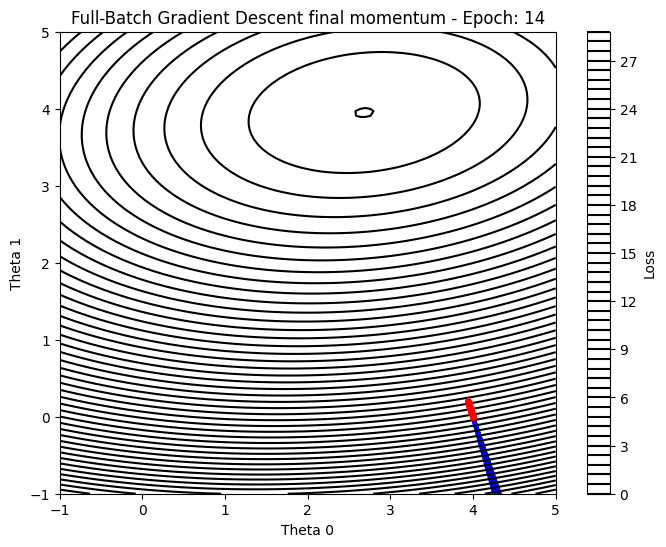

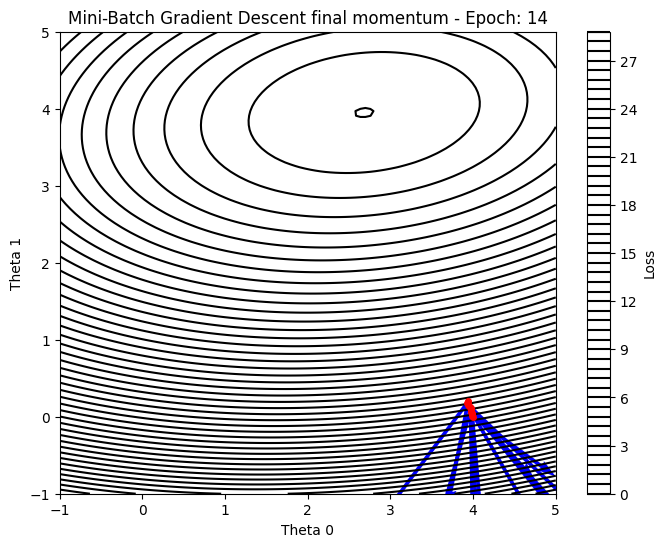

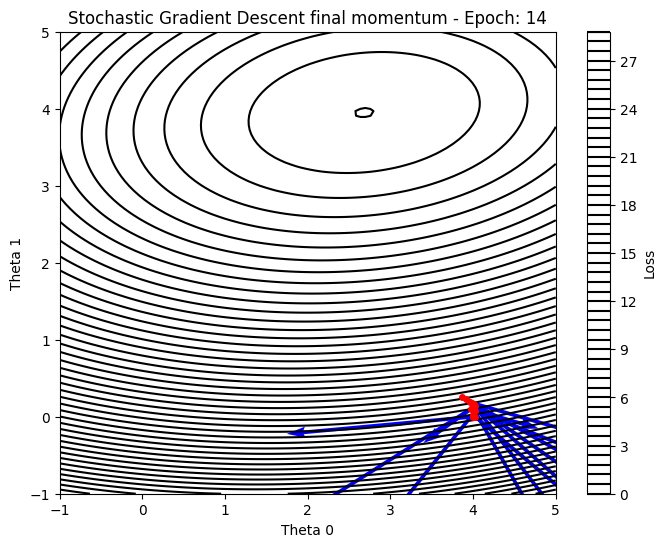

In [42]:
def compute_loss(theta_0, theta_1, x, y):
    y_pred = theta_0 + theta_1 * x
    loss = ((y_pred - y) ** 2).mean()
    return loss


def compute_gradient(theta_0, theta_1, x, y):
    y_pred = theta_0 + theta_1 * x
    grad_theta_0 = 2 * (y_pred - y).mean()
    grad_theta_1 = 2 * ((y_pred - y) * x).mean()
    return grad_theta_0, grad_theta_1


def create_animation(x, y, trajectories, momentums, titles, filename):
    fig, ax = plt.subplots(figsize=(8, 6))
    theta_0_vals = np.linspace(-1, 5, 100)
    theta_1_vals = np.linspace(-1, 5, 100)
    loss_vals = np.zeros((len(theta_0_vals), len(theta_1_vals)))

    for i in range(len(theta_0_vals)):
        for j in range(len(theta_1_vals)):
            theta_0 = torch.tensor(theta_0_vals[i], requires_grad=False)
            theta_1 = torch.tensor(theta_1_vals[j], requires_grad=False)
            loss_vals[i, j] = compute_loss(theta_0, theta_1, x, y).item()

    contour = ax.contour(theta_0_vals, theta_1_vals, loss_vals, levels=50, colors='black')
    cbar = fig.colorbar(contour)
    cbar.ax.set_ylabel('Loss')

    def update(frame):
        ax.clear()
        ax.contour(theta_0_vals, theta_1_vals, loss_vals, levels=50, colors='black')
        ax.set_title(f'{titles[0]} - Epoch: {frame}')
        ax.set_xlabel('Theta 0')
        ax.set_ylabel('Theta 1')

        trajectory = np.array(trajectories[0])
        momentum = np.array(momentums[0])


        ax.plot(trajectory[:frame, 0], trajectory[:frame, 1], marker='o', color='red', linestyle='-', linewidth=2, markersize=4)
        ax.scatter(trajectory[min(frame, len(trajectory)-1), 0], trajectory[min(frame, len(trajectory)-1), 1], marker='x', color='white', s=100)


        for i in range(1, frame):
            ax.quiver(trajectory[i-1, 0], trajectory[i-1, 1],
                      momentum[i-1, 0], momentum[i-1, 1],
                      color='blue', angles='xy', scale_units='xy', scale=1, label='Momentum' if i == 1 else "")

        return ax

    ani = FuncAnimation(fig, update, frames=range(0, len(trajectories[0])), repeat=False)
    ani.save(filename, writer='pillow')



trajectory_full = list(zip(theta0f2, theta1f2))
momentum_full = list(zip(mf0, mf1))

trajectory_mini = list(zip(theta0m2, theta1m2))
momentum_mini = list(zip(mm0, mm1))

trajectory_stochastic = list(zip(theta0s2, theta1s2))
momentum_stochastic = list(zip(ms0, ms1))


create_animation(x_tensor, y_tensor, [trajectory_full], [momentum_full], ["Full-Batch Gradient Descent final momentum"], filename='full_batch_optimization_momentum.gif')
create_animation(x_tensor, y_tensor, [trajectory_mini], [momentum_mini], ["Mini-Batch Gradient Descent final momentum"], filename='mini_batch_optimization_momentum.gif')
create_animation(x_tensor, y_tensor, [trajectory_stochastic], [momentum_stochastic], ["Stochastic Gradient Descent final momentum"], filename='stochastic_optimization_momentum.gif')


<i>*Contour Plots for gradient descent with momentum*

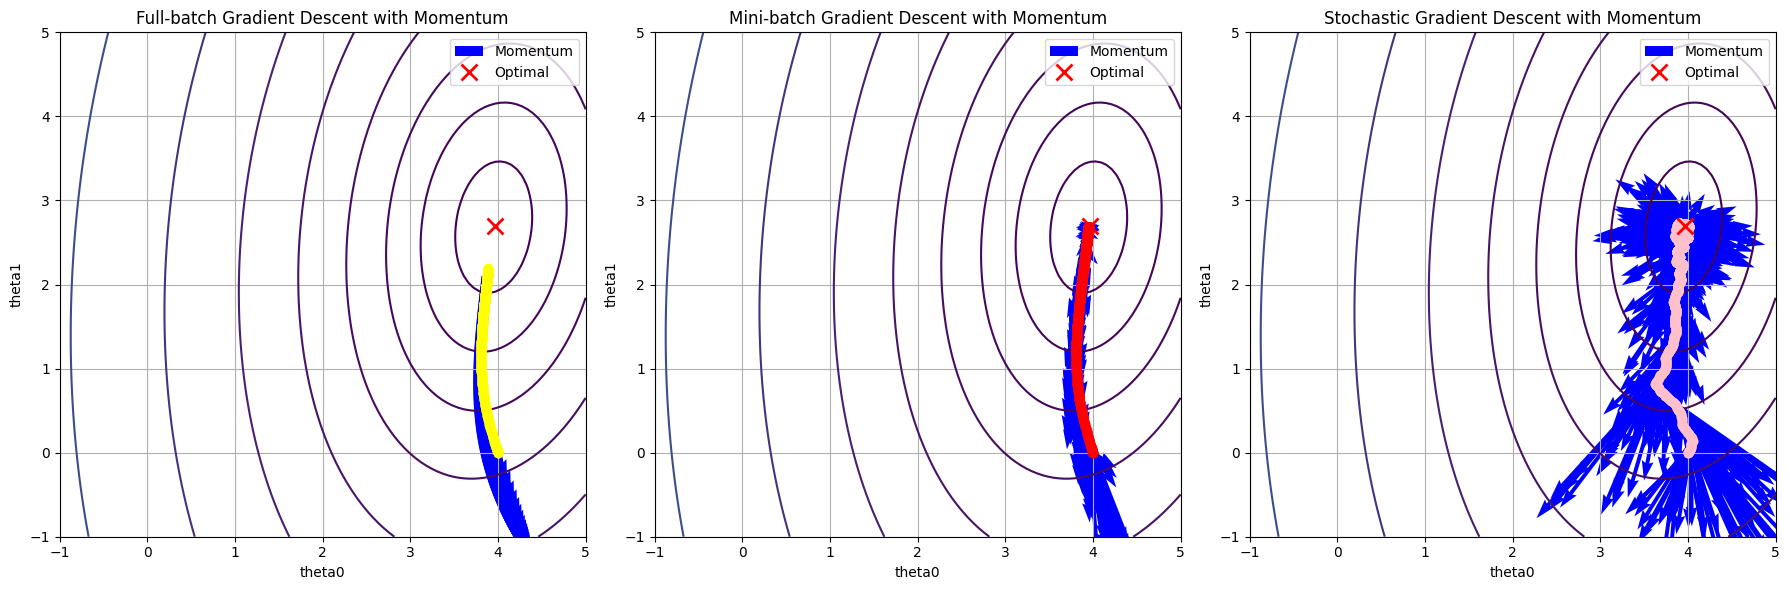

In [ ]:
# Create the 1x3 subplot for each method's trajectory (with momentum)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

def plot_vectors(ax, theta_vals, momentums0,momentums1, color, label): #Removed gradients argument
    for i in range(len(theta_vals) - 1):
        # Current theta values
        theta0, theta1 = theta_vals[i]
        next_theta0, next_theta1 = theta_vals[i+1]

        # Gradient direction
        #grad0, grad1 = gradients[i]

        # Momentum direction
        momentum0=momentums0[i]
        momentum1=momentums1[i]

        # Plot current theta
        ax.plot([theta0, next_theta0], [theta1, next_theta1], 'o-', color=color)

        # Plot gradient vector
        #ax.quiver(theta0, theta1,  color='green', angles='xy', scale_units='xy', scale=1, label='Gradient' if i == 0 else "")

        # Plot momentum vector
        ax.quiver(theta0, theta1, momentum0, momentum1, color='blue', angles='xy', scale_units='xy', scale=1, label='Momentum' if i == 0 else "")

# Plot for Full-batch Gradient Descent with Momentum
axes[0].contour(theta0_grid, theta1_grid, loss_grid, levels=np.logspace(-2, 2, 20), cmap='viridis')
plot_vectors(axes[0], list(zip(theta0_vals_fullm, theta1_vals_fullm)), momentums0_full, momentums1_full, color='yellow', label='Full-batch with Momentum') #Added momentums1_full argument
axes[0].plot(optimal_theta0, optimal_theta1, 'rx', markersize=12, label='Optimal', markeredgewidth=2)  # Cross at the center
axes[0].set_title('Full-batch Gradient Descent with Momentum')
axes[0].set_xlabel('theta0')
axes[0].set_ylabel('theta1')
axes[0].grid(True)
axes[0].legend()

# Plot for Mini-batch Gradient Descent with Momentum
axes[1].contour(theta0_grid, theta1_grid, loss_grid, levels=np.logspace(-2, 2, 20), cmap='viridis')
plot_vectors(axes[1], list(zip(theta0_vals_minim, theta1_vals_minim)), momentums0_mini,momentums1_mini,color='red', label='Mini-batch with Momentum') #Added momentums1_mini argument
axes[1].plot(optimal_theta0, optimal_theta1, 'rx', markersize=12, label='Optimal', markeredgewidth=2)  # Cross at the center
axes[1].set_title('Mini-batch Gradient Descent with Momentum')
axes[1].set_xlabel('theta0')
axes[1].set_ylabel('theta1')
axes[1].grid(True)
axes[1].legend()

# Plot for Stochastic Gradient Descent with Momentum
axes[2].contour(theta0_grid, theta1_grid, loss_grid, levels=np.logspace(-2, 2, 20), cmap='viridis')
plot_vectors(axes[2], list(zip(theta0_vals_sgdm, theta1_vals_sgdm)),  momentums0_sgd, momentums1_sgd,color='pink', label='SGD with Momentum') #Added momentums1_sgd argument
axes[2].plot(optimal_theta0, optimal_theta1, 'rx', markersize=12, label='Optimal', markeredgewidth=2)  # Cross at the center
axes[2].set_title('Stochastic Gradient Descent with Momentum')
axes[2].set_xlabel('theta0')
axes[2].set_ylabel('theta1')
axes[2].grid(True)
axes[2].legend()


plt.tight_layout()
plt.show()


<i>Loss vs Epochs for gradient descent with momentum

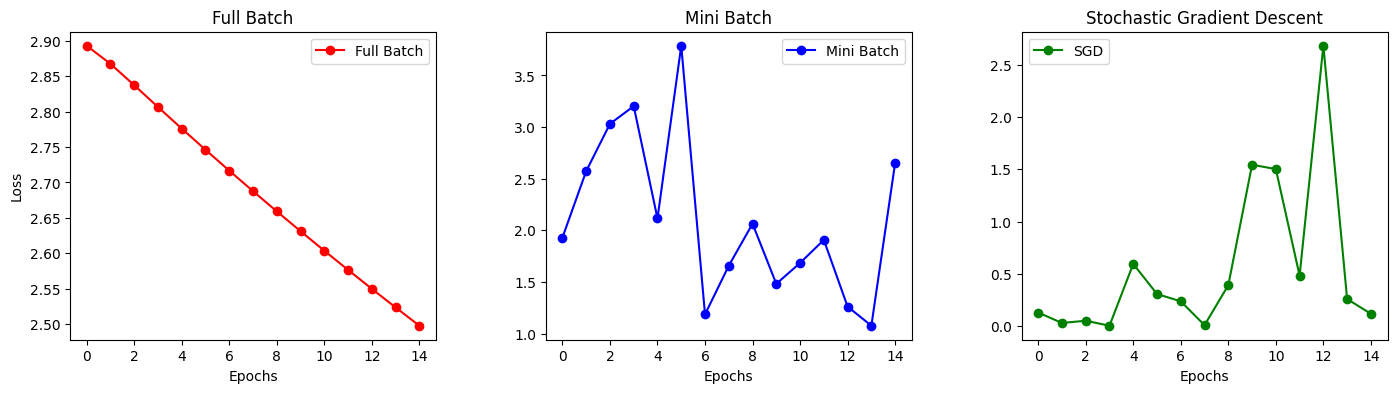

In [43]:
plt.figure(figsize=(17, 4))  # Wider figure to fit 3 subplots
plt.subplot(1, 3, 1)
plt.plot(range(0, 15), full_batch_lossesm[:15], marker="o", color='red', label='Full Batch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Full Batch')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(0, 15), loss_epoch_minim[:15], marker="o", color='blue', label='Mini Batch')
plt.xlabel('Epochs')
plt.title('Mini Batch')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(0, 15), loss_epoch_sgdm[:15], marker="o", color='green', label='SGD')
plt.xlabel('Epochs')

plt.title('Stochastic Gradient Descent')
plt.legend()

# Adjust spacing between subplots to avoid overlap
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()
